# Simulate spacetime geodesics

Using Hamiltonian mechanics and automatic differentiation.

In [1]:
using Plots, ForwardDiff

In [2]:
# Metric
g(t,r,θ,ϕ) = [
	1-1/r  0.        0.   0.
	0.    -1/(1-1/r) 0.   0.
	0.     0.        -r^2 0.
	0.     0.        0.   -r^2*sin(θ)^2
]

g (generic function with 1 method)

In [3]:
H(p,q) = sum(p .* (g(q...)\p))

H (generic function with 1 method)

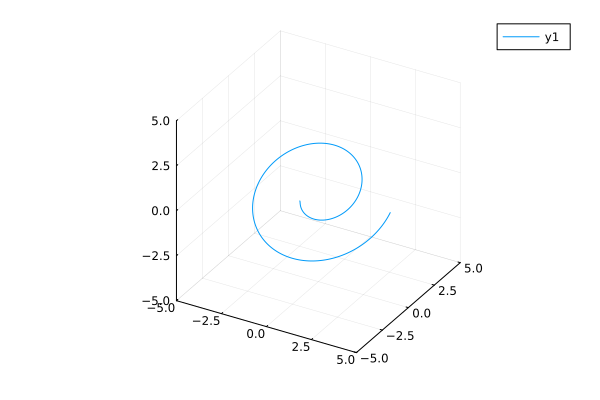

In [4]:
let
	p  = [1.,0.,-1.,1.5]
	q  = [0.,4,π/2,0.]

	x  = Float64[]
	y  = Float64[]
	z  = Float64[]

	ctr = 0
	while ctr < 100000 && q[2]>1.
		dq = ForwardDiff.gradient(p->H(p,q),p)
		dp = -ForwardDiff.gradient(q->H(p,q),q)

		p .+= dp*0.01
		q .+= dq*0.01

		push!(x,q[2]*cos(q[4])*sin(q[3]))
		push!(y,q[2]*sin(q[4])*sin(q[3]))
		push!(z,q[2]*cos(q[3]))

		ctr += 1
	end
	plot(x,y,z,xlim=(-5,5),ylim=(-5,5),zlim=(-5,5))
end